In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import os
import os.path

In [2]:
scenarios_folder = os.path.expanduser('~/interscsimulator/scenarios/digital-rails-av-paulista/')

In [3]:
def parse_arrivals(filename, prefix=''):
    tree = ET.parse(filename)
    root = tree.getroot()

    events = []
    for child in root:        
        if (len(prefix) == 0 or (prefix in child.attrib['person'])):
            trip_time = int(child.attrib['trip_time'])
            distance = int(child.attrib['distance'])

            events.append({'trip_time_s': trip_time, 'distance_m': distance})

    return pd.DataFrame(events)

In [4]:
warmup = 1000

df1 = parse_arrivals(scenarios_folder + 'peak_dr_algo_0_0/arrivals.xml')[warmup:]
df2 = parse_arrivals(scenarios_folder + 'peak_dr_algo_0_0/arrivals-without-signals.xml')[warmup:]

In [5]:
df1[warmup:].trip_time_s.mean()

430.4095154699358

In [6]:
df2[warmup:].trip_time_s.mean()

445.4562171628722

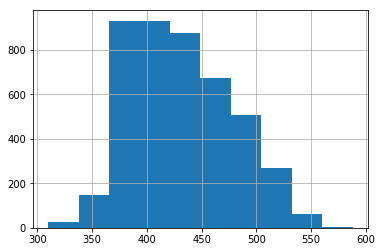

In [7]:
df1.trip_time_s.hist()

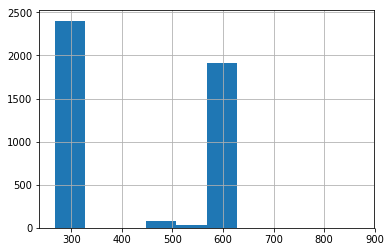

In [8]:
df2.trip_time_s.hist()